![title](https://miro.medium.com/max/425/1*05vDjNRMACek8hWh1pnltA.png)

### __Importação dos módulos__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# Configurações para o Seaborn.
from IPython.core.pylabtools import figsize
sns.set()
figsize(12,8)

### __Carregando o Dataset__

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

answer = pd.DataFrame()

# A coluna 'NU_INSCRICAO' de df_test deve ser salva em answer para gerar o .csv de resposta que o desafio pede.
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [4]:
print(f'DataFrame: df_train\nLinhas: {df_train.shape[0]} |\tColunas: {df_train.shape[1]}')

DataFrame: df_train
Linhas: 13730 |	Colunas: 167


In [5]:
print(f'DataFrame: df_train\nLinhas: {df_test.shape[0]} |\tColunas: {df_test.shape[1]}')

DataFrame: df_train
Linhas: 4570 |	Colunas: 43


### __Análise e Tratamento do Dataset__

In [6]:
# Checando se as features de df_teste está contida em df_train.
features_train = df_train.columns.to_list()
features_test = df_test.columns.to_list()

# Se os elementos da lista de features de df_test estiver contido na lista de features de df_train retornará True.
feature_train_contains_test = all(feature in features_train for feature in features_test)

feature_train_contains_test

True

In [7]:
features = df_test.columns.to_list()
features.append('IN_TREINEIRO')
features

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047',
 'IN_TREINEIRO']

In [8]:
train = df_train[features].copy()
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,0


In [9]:
features.remove('NU_INSCRICAO')
features.remove('IN_TREINEIRO')
test = df_test[features].copy()

In [10]:
train.drop('NU_INSCRICAO', axis=1, inplace=True)

In [11]:
train.select_dtypes('object')

,SG_UF_RESIDENCIA,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,RS,M,D,D,C,A,A,C,H,A
1,CE,F,A,A,B,A,A,A,NaN,A
2,CE,F,D,D,C,A,A,A,NaN,A
3,RJ,F,H,E,E,C,B,C,F,D
4,AM,M,E,D,C,A,A,B,F,A
...,...,...,...,...,...,...,...,...,...,...
13725,SP,M,E,E,G,B,B,B,C,A
13726,PE,F,A,A,C,A,B,B,I,A
13727,RS,F,C,G,B,A,B,A,NaN,A
13728,RJ,M,B,D,G,B,B,C,E,A


In [12]:
train.select_dtypes('object').isna().sum()

SG_UF_RESIDENCIA       0
TP_SEXO                0
Q001                   0
Q002                   0
Q006                   0
Q024                   0
Q025                   0
Q026                   0
Q027                7373
Q047                   0
dtype: int64

In [13]:
train.select_dtypes({'int64', 'float64'}).isnull().sum()

CO_UF_RESIDENCIA             0
NU_IDADE                     0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
NU_NOTA_REDACAO           3597
IN_TREIN

In [14]:
train['Q027'].fillna('-', inplace=True)
test['Q027'].fillna('-', inplace=True)

In [15]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

array([[<AxesSubplot:title={'center':'IN_TREINEIRO'}>]], dtype=object)

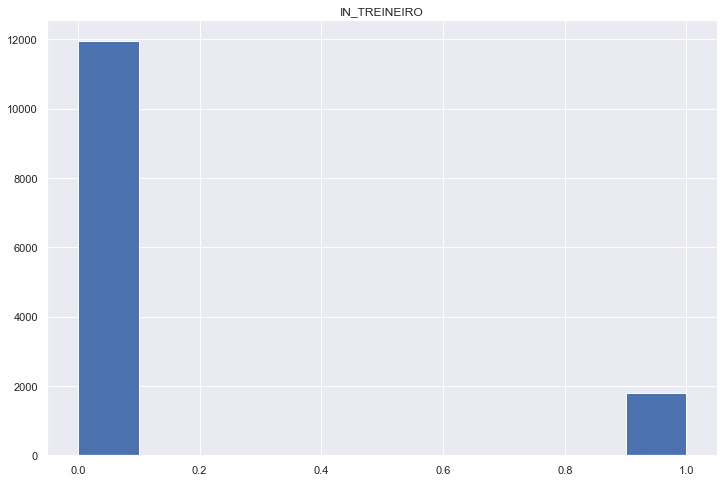

In [16]:
train.hist('IN_TREINEIRO')

In [17]:
train.corr()['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
NU_NOTA_LC                0.083731
NU_NOTA_CN                0.080915
NU_NOTA_COMP1             0.080326
NU_NOTA_CH                0.078276
NU_NOTA_COMP2             0.069545
NU_NOTA_REDACAO           0.069119
NU_NOTA_COMP4             0.068862
NU_NOTA_COMP3             0.064340
TP_STATUS_REDACAO         0.063190
NU_NOTA_COMP5             0.045809
TP_COR_RACA               0.009676
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
TP_ENSINO                -0.225151
TP_DEPENDENCIA_ADM_E

In [18]:
cat_columns = train.select_dtypes('object').columns
num_columns = train.select_dtypes({'int64', 'float64'}).columns
cat_columns

Index(['SG_UF_RESIDENCIA', 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
       'Q026', 'Q027', 'Q047'],
      dtype='object')

In [19]:
num_columns = num_columns.drop('IN_TREINEIRO')
num_columns

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [20]:
print(f'Train\nLinhas: {train.shape[0]}\nColunas: {train.shape[1]}')

Train
Linhas: 13730
Colunas: 43


In [21]:
print(f'Test\nLinhas: {test.shape[0]}\nColunas: {test.shape[1]}')

Test
Linhas: 4570
Colunas: 42


### __Criação de Modelos__

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


Gerando um Pipeline para pré-processar os dados.

In [23]:
transform_columns = make_column_transformer((OneHotEncoder(), cat_columns),
                                            (MinMaxScaler(), num_columns),
                                            remainder="passthrough")

svc_model = SVC()
svc_pipeline = make_pipeline(transform_columns, svc_model)

Separando os dados de `treino` e `teste`.

In [24]:
X_train = train.drop('IN_TREINEIRO', axis=1)
y_train = train['IN_TREINEIRO']
X_test = test.copy()

Treinando o modelo...

In [25]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['SG_UF_RESIDENCIA', 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
       'Q026', 'Q027', 'Q047'],
      dtype='object')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLU...
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
 

In [26]:
y_pred = svc_pipeline.predict(X_test)

### __Avaliando o resultado__

In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [28]:
cross_val_score(svc_pipeline, X_train, y_train, cv=10).mean()

0.9615440640932265

In [29]:
cross_val_score(svc_pipeline, X_test, y_pred, cv=10).mean()

0.9923413566739605

In [30]:
answer['IN_TREINEIRO'] = y_pred
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [31]:
answer.to_csv('answer.csv', index=False, header=True)

Score:<br>
![title](img/score.png)

#### Talvez podemos melhorar o score desse modelo.

Usaremos o algoritmo `RandomForestClassifier()`

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
X_train = train.drop('IN_TREINEIRO', axis=1)
y_train = train['IN_TREINEIRO']
X_test = test.copy()

In [34]:
random_forest_clf = RandomForestClassifier()

In [35]:
random_forest_pipeline = make_pipeline(transform_columns, random_forest_clf)

In [36]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['SG_UF_RESIDENCIA', 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
       'Q026', 'Q027', 'Q047'],
      dtype='object')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLU...
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
 

In [37]:
cross_val_score(random_forest_pipeline, X_train, y_train, cv=10).mean()

0.9957028404952657

In [38]:
y_pred_rfr = random_forest_pipeline.predict(X_test)

In [39]:
cross_val_score(random_forest_pipeline, X_test, y_pred_rfr, cv=10).mean()

0.9982494529540482

In [40]:
answer['IN_TREINEIRO'] = y_pred_rfr
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [41]:
answer.to_csv('answer.csv', index=False, header=True)

Score:<br>
![title](img\score_2.png)

#### __Obs.: Normalmente, quando usamos o algoritmo `RandomForestClassifier()` ou similares, fazemos testes exaustivos (`GridSearch()` | `RandomizedSearch()`) nos seus parâmetros com o intuito de melhorar o rendimento do modelo. Entretanto, neste caso, utilizando os parametros default do algoritmo nos deu uma nota boa e um teste exaustivo pode ser custoso e a melhora da performance pode ser irrisória.__